
K-Means Customer Segmentation Analysis


In [30]:
import numpy as np
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [31]:
# 1.อ่านไฟล์

Customer = pd.read_csv('Mall_Customers.csv')
Customer

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [32]:
# 2.แสดงผล 10 บรรทัดแรก

Customer.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [37]:
# 3.ตรวจสอบ missing values,หาค่าสถิติพื้นฐาน

Customer.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
Customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


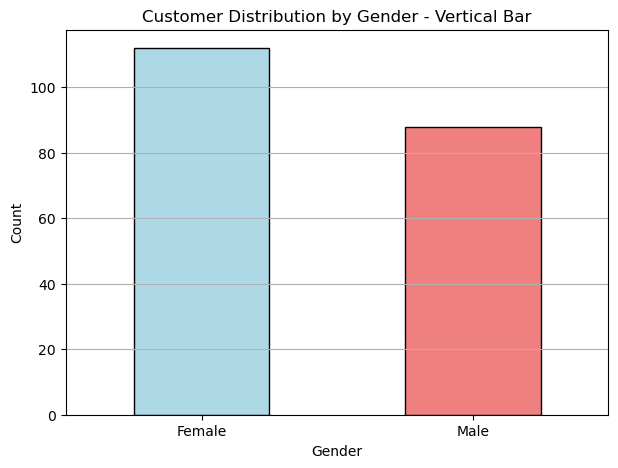

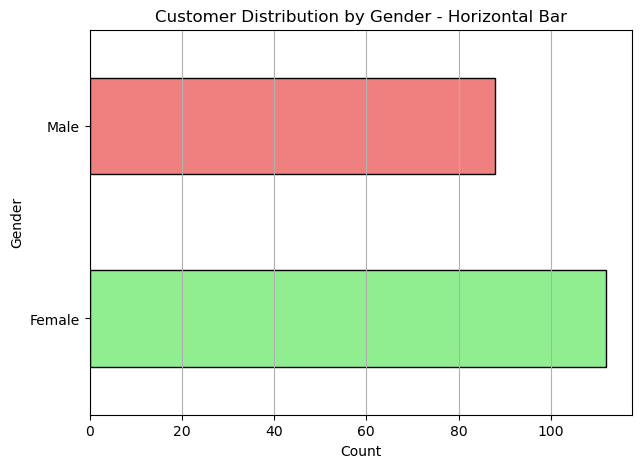

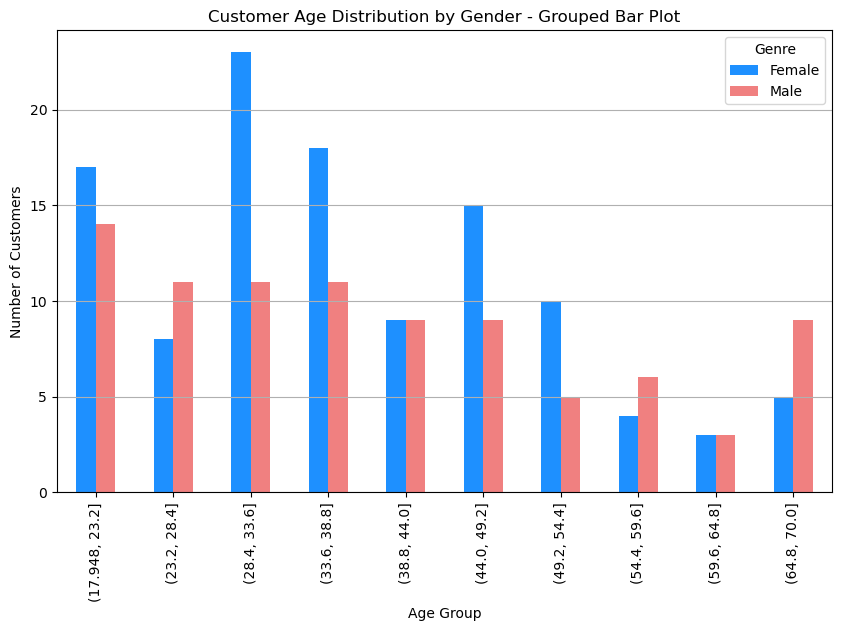

In [35]:
# 4.ดูการแจกแจง โดยแสดงกราฟแท่งของลูกค้าแยกตามเพศ มีตัวอย่างคำสั่งในการ plot หลายรูปแบบ


# Plotting bar charts for customer distribution by Gender in different styles

# Bar chart 1 - Simple vertical bars
plt.figure(figsize=(7, 5))
df['Genre'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'], edgecolor='black')
plt.title('Customer Distribution by Gender - Vertical Bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Bar chart 2 - Horizontal bars
plt.figure(figsize=(7, 5))
df['Genre'].value_counts().plot(kind='barh', color=['lightgreen', 'lightcoral'], edgecolor='black')
plt.title('Customer Distribution by Gender - Horizontal Bar')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.grid(axis='x')
plt.show()

# Example 3: Grouped bar plot (Male and Female ages grouped by bins)
age_bins_gender = pd.crosstab(pd.cut(df['Age'], bins=10), df['Genre'])

age_bins_gender.plot(kind='bar', stacked=False, figsize=(10, 6), color=['dodgerblue', 'lightcoral'])
plt.title('Customer Age Distribution by Gender - Grouped Bar Plot')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

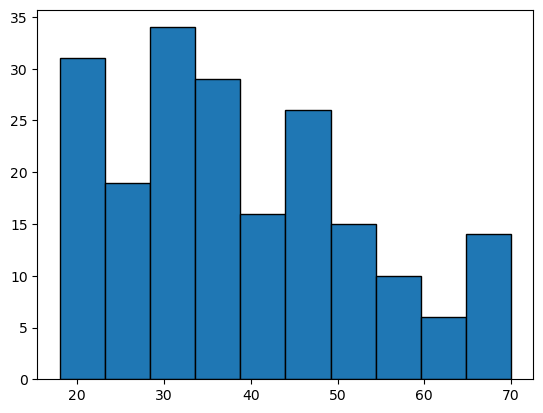

In [45]:
# 5.สร้าง histogram,pie ของอายุ แบ่งเป็น 10 bin (pie ไม่ได้ทำ)

plt.hist(Customer['Age'],bins=10, edgecolor = 'black')

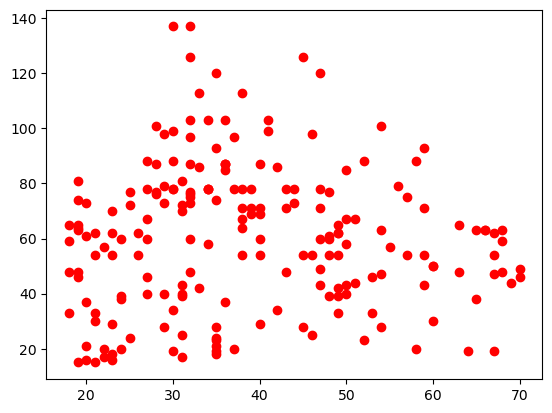

In [49]:
# 6.ทำ scatter plot,pie ของข้อมูล Age, Income ทั้งแบบแยกและไม่แยกตามเพศ (pie ไม่ได้ทำ)

plt.scatter(Customer['Age'], Customer['Annual Income (k$)'], color = "red")

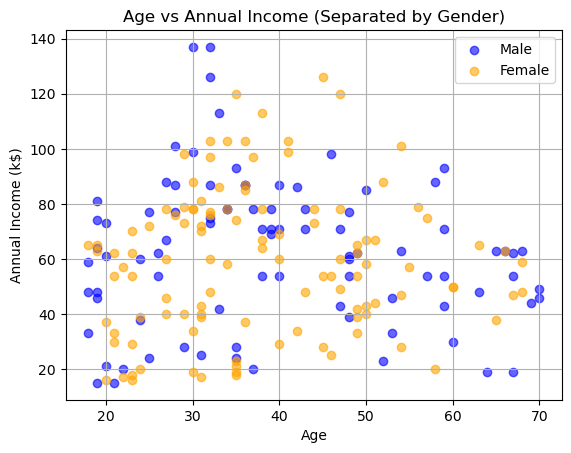

In [52]:
for gender, color in zip(['Male', 'Female'], ['blue', 'orange']):
    gender_data = Customer[Customer['Genre'] == gender]
    plt.scatter(gender_data['Age'], gender_data['Annual Income (k$)'], color=color, alpha=0.6, label=gender)

plt.title('Age vs Annual Income (Separated by Gender)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.grid(True)
plt.show()

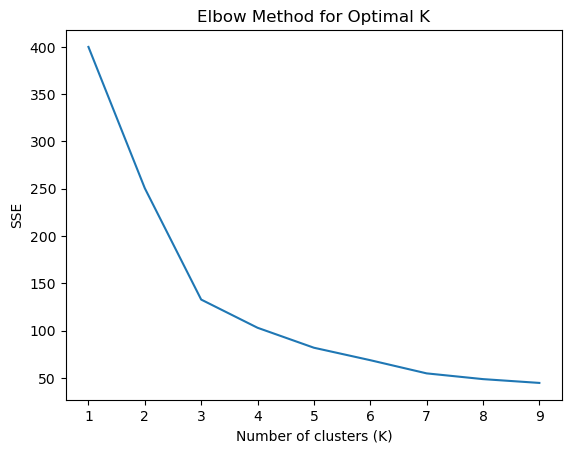

In [65]:
# 7. นำ ข้อมูล Age, Income มาทำ clustering พิจารณาค่า K ที่ดีที่สุดเพื่อนำไปทำ K-Mean clustering

from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering (Age and Annual Income)
clustering_data = Customer[['Age', 'Annual Income (k$)']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(clustering_data)

# Use the Elbow method to find the best value of K for K-Means clustering
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_scaled)
    sse[k] = kmeans.inertia_

# วาดกราฟ
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

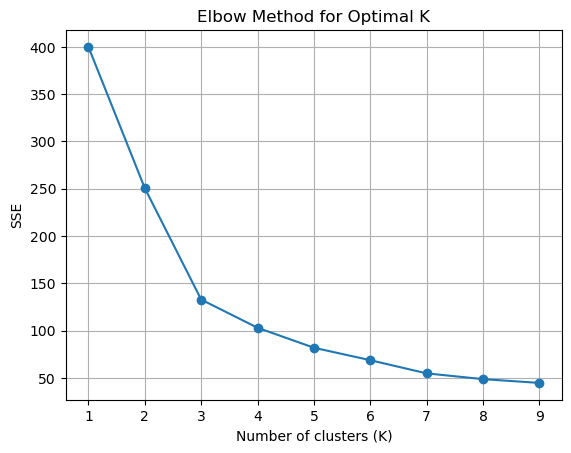

In [72]:
# 8.ได้ค่า k= ? ในการจัดกลุ่มโดยวิธี K-Means

clustering_data = Customer[['Age', 'Annual Income (k$)']]


scaler = StandardScaler()
data_scaled = scaler.fit_transform(clustering_data)

#Elbow Method เพื่อหาค่า K ที่ดีที่สุด
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_scaled)
    sse[k] = kmeans.inertia_

#วาดกราฟ
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.xticks(range(1, 10))  # เพิ่มแกน X ให้ชัดเจน
plt.grid()
plt.show()

# 3

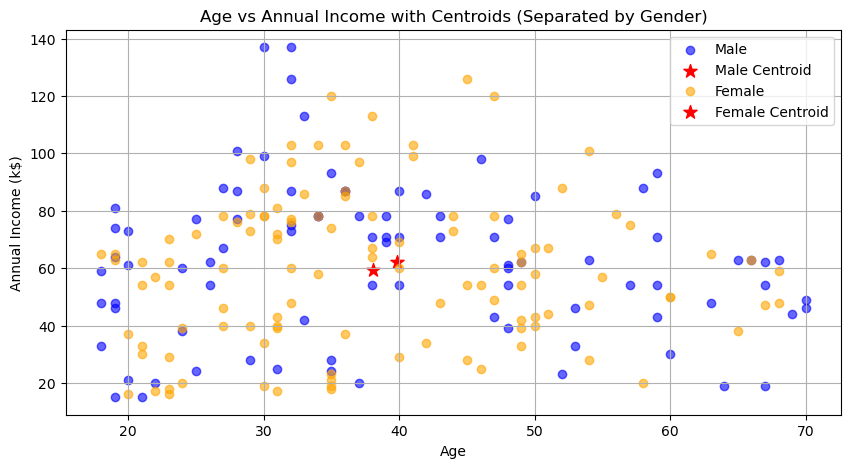

In [73]:
# 9.ทำ scatter plot ที่แสดง centroid

# Scatter plot with centroids for Age vs Annual Income, separated by Gender

plt.figure(figsize=(10, 5))

# Plotting the data points by Gender
for gender, color in zip(['Male', 'Female'], ['blue', 'orange']):
    gender_data = Customer[Customer['Genre'] == gender]
    plt.scatter(gender_data['Age'], gender_data['Annual Income (k$)'], color=color, alpha=0.6, label=gender)
    
    # Calculate the centroid for the current gender group
    centroid_age = gender_data['Age'].mean()
    centroid_income = gender_data['Annual Income (k$)'].mean()
    
    # Plot the centroid
    plt.scatter(centroid_age, centroid_income, color='red', marker='*', s=100, label=f'{gender} Centroid')

# Adding plot details
plt.title('Age vs Annual Income with Centroids (Separated by Gender)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.grid(True)
plt.show()